In [1]:
from finlab.data import Data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import talib
from talib import  abstract

In [2]:
data = Data()
price = data.get('收盤價',300) 
benchmark = price['0050']
benchmark.head()
import sqlite3
import os

conn = sqlite3.connect(os.path.join('data' , 'data.db'))

df = pd.read_sql('select stock_id , date , 開盤價 , 收盤價 , 最低價,  最高價 , 成交股數 from price where stock_id ="0050" ' ,conn,index_col=['date'] , parse_dates=['date'])

df.rename(columns = {'收盤價':'close' ,"開盤價":"open", '最高價': 'high' ,'最低價': 'low' ,'成交股數':'volume' } , inplace =True )

In [3]:
# 創建布林通道：  週期 20日（＝日K月均線）、1個標準差
BBAND20 = abstract.BBANDS(df, timeperiod=20, nbdevup=1, nbdevdn=1, matype=2)
# 創建 KD 指標：（預設參數）
STOCH = abstract.STOCH(df)
# 建立買進信號：KD在低檔（小於25）金叉，且收盤價仍在布林通道中線以下時。
SGNL_B = (STOCH['slowk'] < 25) & (STOCH['slowk'] > STOCH['slowd']) & (STOCH['slowk'].shift() < STOCH['slowd'].shift()) & (df['close'] <= BBAND20['middleband'])
# 建立賣出信號：昨日收盤價仍在布林通道上緣，今日收盤價卻跌落布林通道上緣時。
SGNL_S = (df['close'] < BBAND20['upperband']) & (df['close'].shift() > BBAND20['upperband'].shift())

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


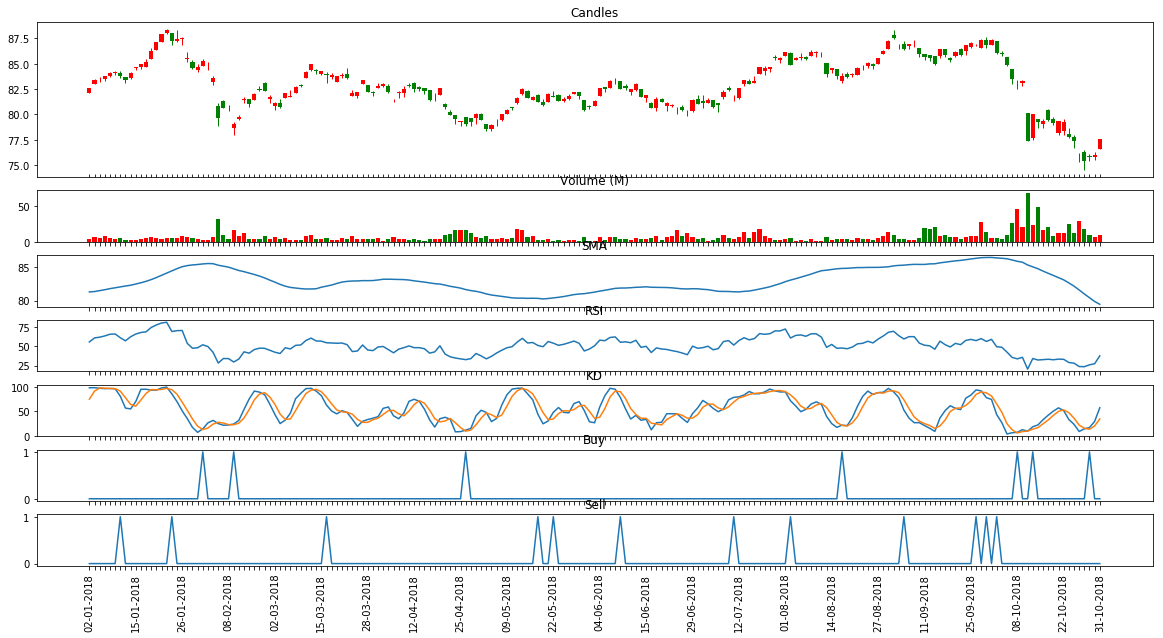

In [6]:
from talib import abstract

# 創建各種指標
SMA = abstract.SMA(df,timeperiod = 20)
RSI = abstract.RSI(df)
STOCH = abstract.STOCH(df)

from finlab.plot_candles import plot_candles
plot_candles(
             # 起始時間、結束時間
            
             start_time='2018-10-01',
             end_time='2018-12-5',
             
             # 股票的資料
             pricing=df, 
             title='Candles', 
    
             # 是否畫出成交量？
             volume_bars=True, 
    
             # 將某些指標（如SMA）跟 K 線圖畫在一起
         #    overlays=[BBANDS20std] ,#, SGNL_B ,SGNL_S , BBANDS20std], 
    
             # 將某些指標（如RSI, STOCH）單獨畫在獨立的畫格中
             technicals = [SMA , RSI,  STOCH , SGNL_B ,SGNL_S] ,
    
             # 重新命名額外的畫格名稱（跟指標名稱一樣就可以囉！）
             technicals_titles=['SMA' ,'RSI', 'KD' , 'Buy' , 'Sell']
            )